<center><img src="https://user-images.githubusercontent.com/61051085/81343928-3ce9d500-908c-11ea-9850-0210b4e94ba0.jpg" alt="LOGO" width="320" height="160" /> </center>

# Programa de Pós-Graduação Informática Aplicada - PPGIA
## Doutorado em Ciência de Dados e Inteligência Artificial
    Disciplina: M907 - Sistemas Distribuídos | Professor Dr. Nabor Mendonça
    Antonio Marcos Aires Barbosa | Matrícula: 2016397

# TRABALHO 03:
    - Realização de Testes de Carga com Múltiplas Instâncias do Wordpress Utilizando o Locust

## Introdução: 
    O objetivo do trabalho é realizar testes de carga com múltiplas instâncias do Wordpress, tal como configuradas no Trabalho 2. Para isso, você deverá instalar e configurar o Locust, uma ferramenta para geração de carga para aplicações web.
 
 
## Atividade: 
    Realizar testes de carga utilizando o gerador de carga Locust para avaliar o desempenho de diversos cenários de uso do Wordpress, variando a arquitetura da aplicação (número de instâncias do Wordpress) e variando a quantidade de usuários gerados pelo Locust. O contêiner do Locust deve ser definido e adicionado ao docker-compose criado no Trabalho 2.
    
    Cenários de teste:
        Blog post com uma imagem de aproximadamente 1mb;
        Blog post com um texto de aproximadamente 400kb;
        Blog post com uma imagem de 300kb;


## Entregáveis:

	Cada cenário de teste deve ser executado com pelo menos três crescentes números de usuários gerados pelo Locust (por exemplo, 10, 100, e 1000), e pelo menos três crescentes números de instâncias do WordPress (por exemplo, 1, 2, e 3). Os resultados de cada cenário, representados pelos valores das métricas coletadas pelo Locust (por exemplo, tempo de resposta, requisições por segundo, etc.) deverão ser visualizados na forma de gráficos, com o número de usuários ou a quantidade de instâncias do WordPress representados no eixo X, e os valores das métricas no eixo Y.
    As figuras abaixo ilustram os estilos de gráficos que deverão ser entregues.
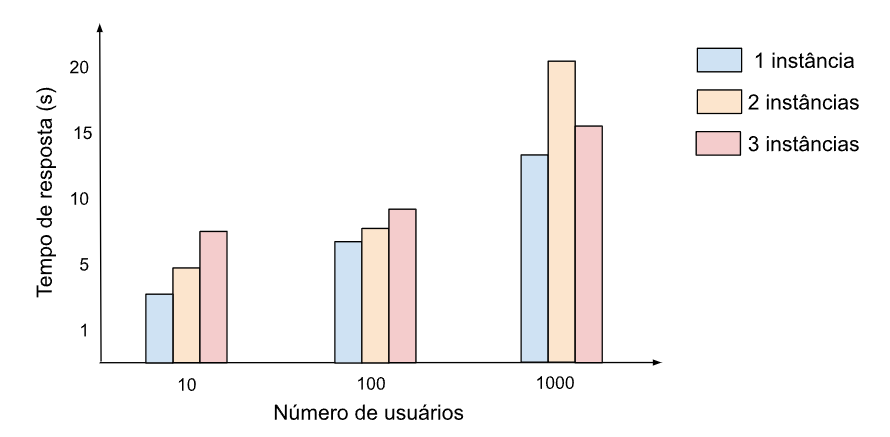
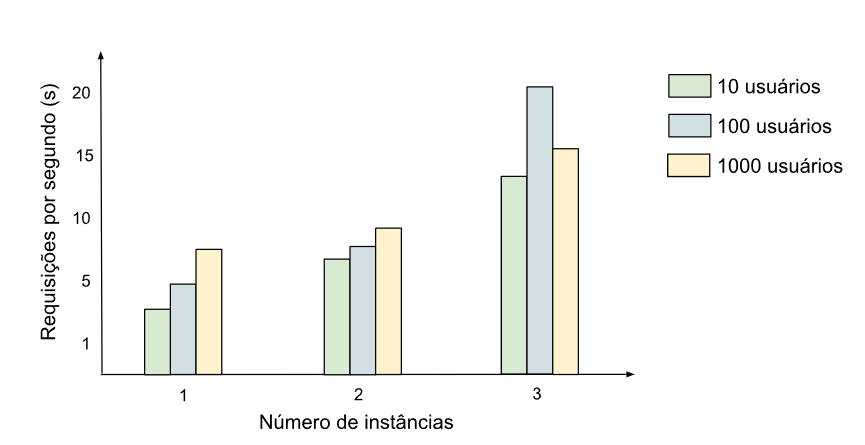

# ----------------------------------------------------------------------------------------
# Respostas
# ----------------------------------------------------------------------------------------

## Arquivos de Configuração

## nginx.conf

## docker-compose.yml

## Rodar conteiners do Docker
    docker-compose up -d

## Conteiners funcionando

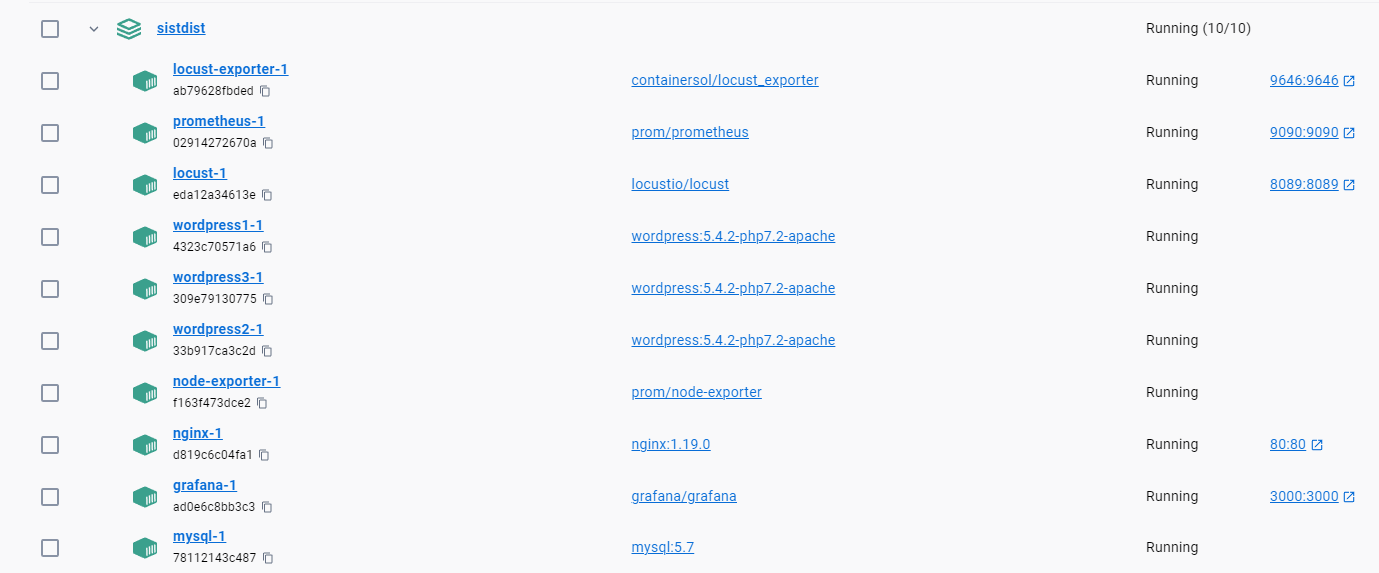

## Criar os posts no Wordpress:
    
    http://localhost/wp-login.php

## Criar o arquivo de configuração dos testes de carga:
## locustfile.py

In [1]:
!locust --version

locust 2.15.1 from C:\Users\marco\AppData\Roaming\Python\Python39\site-packages\locust (python 3.9.16)


%%writefile locustfile.py
from locust import HttpUser, TaskSet, task, between

class UserBehavior(TaskSet):
    host = "http://nginx"    # O endereço do servidor Nginx a ser testado
    wait_time = between(5, 15)      # O tempo de espera entre as tarefas para cada usuário virtual é um valor aleatório entre 5 e 15 segundos
    
    @task
    def index(self):
        self.client.get("/")

    @task
    def blog_post_with_large_image(self):
        self.client.get("/2023/06/17/post1/")

    @task
    def blog_post_with_text(self):
        self.client.get("/2023/06/15/post2/")

    @task
    def blog_post_with_small_image(self):
        self.client.get("/2023/06/17/post3/")

class WebsiteUser(HttpUser):
    tasks = [UserBehavior]
    wait_time = between(5, 15)

## Plotar os resultados colhidos pelo Locust

In [2]:
# !pip install seaborn
from matplotlib.ticker import FuncFormatter
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import glob

# Obtém uma lista de todos os arquivos CSV na pasta atual
# csv_files = glob.glob('teste_carga\output_u_*_stats.csv')
csv_files = glob.glob('teste_carga\output_u_*_i_*stats.csv')


In [3]:
len(csv_files)

8

In [4]:
list(csv_files)

['teste_carga\\output_u_100_i_1_stats.csv',
 'teste_carga\\output_u_100_i_2_stats.csv',
 'teste_carga\\output_u_100_i_3_stats.csv',
 'teste_carga\\output_u_10_i_1_stats.csv',
 'teste_carga\\output_u_10_i_2_stats.csv',
 'teste_carga\\output_u_10_i_3_stats.csv',
 'teste_carga\\output_u_400_i_1_stats.csv',
 'teste_carga\\output_u_400_i_2_stats.csv']

# Versão 3 instâncias - Bateria de testes 01

In [5]:
csv_files[0].split('_')

['teste', 'carga\\output', 'u', '100', 'i', '1', 'stats.csv']

In [6]:
# file.split('_')[-4]

In [7]:
# file.split('_')[-2][0]

In [8]:
# !pip install seaborn
from matplotlib.ticker import FuncFormatter
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import glob

# Obtém uma lista de todos os arquivos CSV na pasta atual
# csv_files = glob.glob('teste_carga\output_u_*_stats.csv')
csv_files = glob.glob('teste_carga\output_u_*_i_*stats.csv')

# Cria um DataFrame vazio para armazenar todos os dados
all_data = pd.DataFrame()

# Itera por todos os arquivos CSV
for file in csv_files:
    # Lê o arquivo CSV em um DataFrame
    df = pd.read_csv(file)

    # Adiciona colunas para o número de usuários e instâncias do WordPress
    df['users'] = int(file.split('_')[-4])
    df['instances'] = int(file.split('_')[-2][0])

    # Adiciona os dados ao DataFrame principal
    all_data = pd.concat([all_data, df])

# Ordena por quantidade de usuários e de instâncias
all_data.sort_values(['users', 'instances'], inplace=True)

# Agrupa os dados pelo número de usuários e instâncias do WordPress e calcula a mediana
grouped  = all_data.groupby(['users', 'instances'])["Median Response Time"].median().reset_index()
sizes    = all_data.groupby(['users', 'instances'])["Average Content Size"].median().reset_index()
requests = all_data.groupby(['users', 'instances'])["Requests/s"].median().reset_index()
failures = all_data.groupby(['users', 'instances'])["Failures/s"].median().reset_index()

In [9]:
all_data.iloc[:,0:11]

,Type,Name,Request Count,Failure Count,Median Response Time,Average Response Time,Min Response Time,Max Response Time,Average Content Size,Requests/s,Failures/s
0,GET,/,17,0,540.0,606.494788,126.2236,1397.2296,24317.000000,0.192839,0.000000
1,GET,/2023/06/15/post2/,19,0,510.0,454.162126,129.4318,950.1630,27747.000000,0.215526,0.000000
2,GET,/2023/06/17/post1/,20,0,180.0,488.491370,109.0904,1405.1217,23601.000000,0.226870,0.000000
3,GET,/2023/06/17/post3/,32,0,490.0,541.021306,114.7510,1406.3281,23412.000000,0.362992,0.000000
4,NaN,Aggregated,88,0,510.0,522.977284,109.0904,1406.3281,24565.750000,0.998227,0.000000
0,GET,/,31,0,520.0,647.319684,140.2580,1592.1069,24317.000000,0.352861,0.000000
1,GET,/2023/06/15/post2/,22,0,700.0,736.485986,444.4241,1606.4090,27747.000000,0.250417,0.000000
2,GET,/2023/06/17/post1/,16,0,510.0,678.185894,333.2144,1605.2956,23601.000000,0.182122,0.000000
3,GET,/2023/06/17/post3/,20,0,540.0,675.794010,341.0374,1607.2775,23412.000000,0.227652,0.000000
4,NaN,Aggregated,89,0,530.0,681.308499,140.2580,1607.2775,24832.775281,1.013052,0.000000


In [10]:
all_data.iloc[:,12:]

,66%,75%,80%,90%,95%,98%,99%,99.9%,99.99%,100%,users,instances
0,840,860,900,1400,1400,1400,1400,1400,1400,1400,10,1
1,530,550,550,740,950,950,950,950,950,950,10,1
2,540,790,890,1400,1400,1400,1400,1400,1400,1400,10,1
3,550,730,850,990,1400,1400,1400,1400,1400,1400,10,1
4,550,660,840,990,1400,1400,1400,1400,1400,1400,10,1
0,620,760,770,840,1600,1600,1600,1600,1600,1600,10,2
1,800,800,820,910,1600,1600,1600,1600,1600,1600,10,2
2,560,840,840,1600,1600,1600,1600,1600,1600,1600,10,2
3,840,850,930,950,1600,1600,1600,1600,1600,1600,10,2
4,720,800,840,950,1600,1600,1600,1600,1600,1600,10,2


In [11]:
grouped

,users,instances,Median Response Time
0,10,1,510.0
1,10,2,530.0
2,10,3,720.0
3,100,1,130.0
4,100,2,140.0
5,100,3,150.0
6,400,1,130.0
7,400,2,140.0


In [12]:
sizes

,users,instances,Average Content Size
0,10,1,24317.000000
1,10,2,24317.000000
2,10,3,24317.000000
3,100,1,24317.000000
4,100,2,24317.000000
5,100,3,24317.000000
6,400,1,24185.911051
7,400,2,24317.000000


In [13]:
requests

,users,instances,Requests/s
0,10,1,0.226870
1,10,2,0.250417
2,10,3,0.245795
3,100,1,2.479338
4,100,2,2.464668
5,100,3,2.489022
6,400,1,8.330355
7,400,2,8.312206


In [14]:
failures

,users,instances,Failures/s
0,10,1,0.000000
1,10,2,0.000000
2,10,3,0.000000
3,100,1,0.000000
4,100,2,0.000000
5,100,3,0.000000
6,400,1,0.078167
7,400,2,0.000000


In [15]:
all_data

,Type,Name,Request Count,Failure Count,Median Response Time,Average Response Time,Min Response Time,Max Response Time,Average Content Size,Requests/s,...,80%,90%,95%,98%,99%,99.9%,99.99%,100%,users,instances
0,GET,/,17,0,540.0,606.494788,126.2236,1397.2296,24317.000000,0.192839,...,900,1400,1400,1400,1400,1400,1400,1400,10,1
1,GET,/2023/06/15/post2/,19,0,510.0,454.162126,129.4318,950.1630,27747.000000,0.215526,...,550,740,950,950,950,950,950,950,10,1
2,GET,/2023/06/17/post1/,20,0,180.0,488.491370,109.0904,1405.1217,23601.000000,0.226870,...,890,1400,1400,1400,1400,1400,1400,1400,10,1
3,GET,/2023/06/17/post3/,32,0,490.0,541.021306,114.7510,1406.3281,23412.000000,0.362992,...,850,990,1400,1400,1400,1400,1400,1400,10,1
4,NaN,Aggregated,88,0,510.0,522.977284,109.0904,1406.3281,24565.750000,0.998227,...,840,990,1400,1400,1400,1400,1400,1400,10,1
0,GET,/,31,0,520.0,647.319684,140.2580,1592.1069,24317.000000,0.352861,...,770,840,1600,1600,1600,1600,1600,1600,10,2
1,GET,/2023/06/15/post2/,22,0,700.0,736.485986,444.4241,1606.4090,27747.000000,0.250417,...,820,910,1600,1600,1600,1600,1600,1600,10,2
2,GET,/2023/06/17/post1/,16,0,510.0,678.185894,333.2144,1605.2956,23601.000000,0.182122,...,840,1600,1600,1600,1600,1600,1600,1600,10,2
3,GET,/2023/06/17/post3/,20,0,540.0,675.794010,341.0374,1607.2775,23412.000000,0.227652,...,930,950,1600,1600,1600,1600,1600,1600,10,2
4,NaN,Aggregated,89,0,530.0,681.308499,140.2580,1607.2775,24832.775281,1.013052,...,840,950,1600,1600,1600,1600,1600,1600,10,2


In [16]:
all_data.keys()

Index(['Type', 'Name', 'Request Count', 'Failure Count',
       'Median Response Time', 'Average Response Time', 'Min Response Time',
       'Max Response Time', 'Average Content Size', 'Requests/s', 'Failures/s',
       '50%', '66%', '75%', '80%', '90%', '95%', '98%', '99%', '99.9%',
       '99.99%', '100%', 'users', 'instances'],
      dtype='object')

# Agrupado por quantidade de usuários de teste

In [25]:
def plot_loadtest(subfolder):
    # !pip install seaborn
    from matplotlib.ticker import FuncFormatter
    from matplotlib.lines import Line2D
    import matplotlib.pyplot as plt
    import seaborn as sns
    import pandas as pd
    import numpy as np
    import glob

    # Obtém uma lista de todos os arquivos CSV na pasta atual
    # csv_files = glob.glob('teste_carga\output_u_*_stats.csv')
    csv_files = glob.glob('teste_carga\\'+subfolder+'\output_u_*_i_*stats.csv')
    print(f'Lendo arquivos da {subfolder}')

    # Cria um DataFrame vazio para armazenar todos os dados
    all_data = pd.DataFrame()

    # Itera por todos os arquivos CSV
    for file in csv_files:
        # Lê o arquivo CSV em um DataFrame
        df = pd.read_csv(file)

        # Adiciona colunas para o número de usuários e instâncias do WordPress
        df['users'] = int(file.split('_')[-4])
        df['instances'] = int(file.split('_')[-2][0])

        # Adiciona os dados ao DataFrame principal
        all_data = pd.concat([all_data, df])

    # Ordena por quantidade de usuários e de instâncias
    all_data.sort_values(['users', 'instances'], inplace=True)

    # Agrupa os dados pelo número de usuários e instâncias do WordPress e calcula a mediana
    grouped  = all_data.groupby(['users', 'instances'])["Median Response Time"].median().reset_index()
    sizes    = all_data.groupby(['users', 'instances'])["Average Content Size"].median().reset_index()
    requests = all_data.groupby(['users', 'instances'])["Requests/s"].median().reset_index()
    failures = all_data.groupby(['users', 'instances'])["Failures/s"].median().reset_index()

    # Suponha que 'all_data' é o seu DataFrame
    all_data['Requests/s'] = pd.to_numeric(all_data['Requests/s'], errors='coerce')
    all_data['Failures/s'] = pd.to_numeric(all_data['Failures/s'], errors='coerce')
    all_data['users'] = pd.to_numeric(all_data['users'], errors='coerce')

    fig, ax = plt.subplots(figsize=(12, 5))  # Definindo o tamanho da figura

    # Plotagem das barras agrupadas
    sns.barplot(data=all_data, x='users', y='Median Response Time', hue='instances', ax=ax)

    # Adicionar rótulos de dados
    for container in ax.containers:
        for bar in container:
            bar_height = bar.get_height()
            if np.isfinite(bar_height):
                ax.text(
                    bar.get_x() + bar.get_width() / 2,
                    bar_height,
                    round(bar_height, 2),
                    ha='center',
                    va='bottom'
                )

    # Definir posições dos ticks e rótulos no eixo x
    x_positions = np.arange(len(all_data['users'].unique()))
    ax.set_xticks(x_positions)
    ax.set_xticklabels(all_data['users'].unique())
    # ax.set_ylabel('Median Response Time (ms)')
    ax.set_ylabel('Mediana do Tempo de resposta (ms)')

    # Agrupar os dados por 'users' e calcular as médias de 'Requests/s' e 'Failures/s'
    grouped_lines = all_data.groupby('users')[['Requests/s', 'Failures/s']].mean()

    # Plotagem das linhas no eixo secundário
    ax2 = ax.twinx()
    requests_line = ax2.plot(x_positions, grouped_lines['Requests/s'], color='blue', marker='o', label='Requests/s')
    failures_line = ax2.plot(x_positions, grouped_lines['Failures/s'], color='red', marker='o', label='Failures/s')

    # Configurar rótulos e legendas do eixo secundário
    # ax2.set_ylabel('Requests/s and Failures/s')
    ax2.set_ylabel('Taxas de Requisições/s e Falhas/s')
    lines = requests_line + failures_line
    labels = [line.get_label() for line in lines]
    ax2.legend(lines, labels, loc='center left')

    plt.title("Taxas de falhas por medianas de tempo de resposta em função do número de usuários e instâncias")
    plt.show()

Lendo arquivos da bateria01


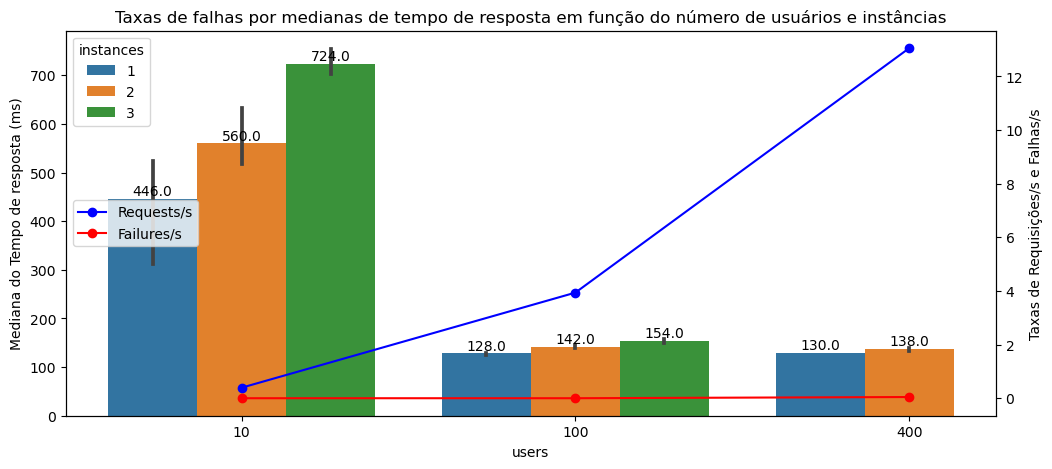

In [26]:
plot_loadtest('bateria01')

Aqui o teste foi interrompido pela máquina reiniciando, devido a falha de disco local

Lendo arquivos da bateria02


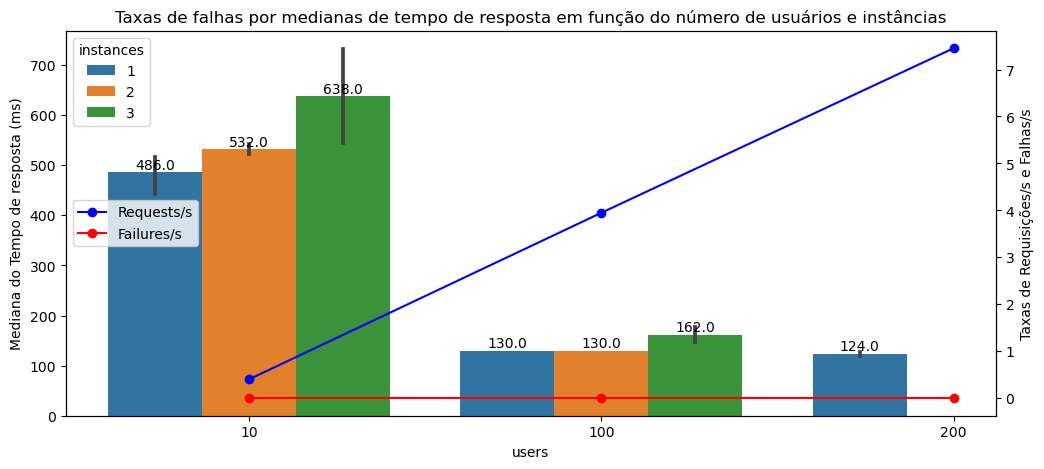

In [28]:
plot_loadtest('bateria02')

# Agrupado por quantidade de instâncias

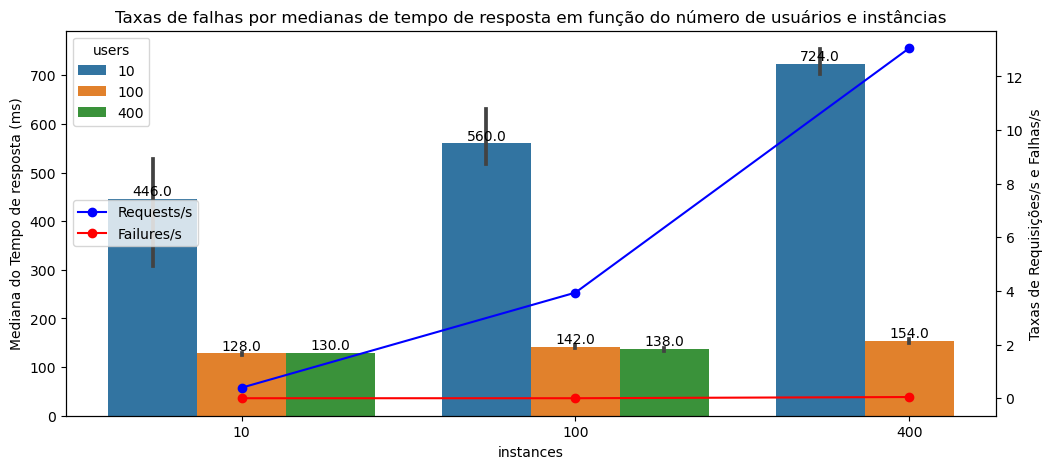

In [22]:
# Suponha que 'all_data' é o seu DataFrame
all_data['Requests/s'] = pd.to_numeric(all_data['Requests/s'], errors='coerce')
all_data['Failures/s'] = pd.to_numeric(all_data['Failures/s'], errors='coerce')
all_data['users'] = pd.to_numeric(all_data['users'], errors='coerce')

fig, ax = plt.subplots(figsize=(12, 5))  # Definindo o tamanho da figura

# Plotagem das barras agrupadas
sns.barplot(data=all_data, x='instances', y='Median Response Time', hue='users', ax=ax)

# Adicionar rótulos de dados
for container in ax.containers:
    for bar in container:
        bar_height = bar.get_height()
        if np.isfinite(bar_height):
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                bar_height,
                round(bar_height, 2),
                ha='center',
                va='bottom'
            )

# Definir posições dos ticks e rótulos no eixo x
x_positions = np.arange(len(all_data['users'].unique()))
ax.set_xticks(x_positions)
ax.set_xticklabels(all_data['users'].unique())
ax.set_ylabel('Mediana do Tempo de resposta (ms)')

# Agrupar os dados por 'users' e calcular as médias de 'Requests/s' e 'Failures/s'
grouped_lines = all_data.groupby('users')[['Requests/s', 'Failures/s']].mean()

# Plotagem das linhas no eixo secundário
ax2 = ax.twinx()
requests_line = ax2.plot(x_positions, grouped_lines['Requests/s'], color='blue', marker='o', label='Requests/s')
failures_line = ax2.plot(x_positions, grouped_lines['Failures/s'], color='red', marker='o', label='Failures/s')

# Configurar rótulos e legendas do eixo secundário
ax2.set_ylabel('Taxas de Requisições/s e Falhas/s')
lines = requests_line + failures_line
labels = [line.get_label() for line in lines]
ax2.legend(lines, labels, loc='center left')

plt.title("Taxas de falhas por medianas de tempo de resposta em função do número de usuários e instâncias")
plt.xlabel("Número de usuários")
plt.show()